<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Chap03_Ex_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pwd

'/content/chap3'

In [9]:
mkdir chap3

In [10]:
cd ./chap3

/content/chap3/chap3


In [11]:
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [12]:
import pandas as pd
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_por = pd.read_csv('student-por.csv', sep=';')

In [13]:
student_data_mat_por = pd.merge(student_data_math,
                                student_data_por,
                                on = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
                                suffixes = ('_math', '_por')
                                )

In [14]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
X = student_data_por.loc[:, ['G1']].values
Y = student_data_por['G3'].values
reg.fit(X, Y)

LinearRegression()

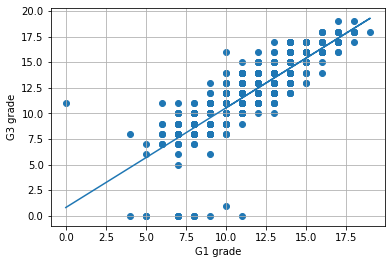

In [15]:
#Exercise 3-5
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

plt.plot(X, reg.predict(X))
plt.grid(True)